In [1]:
library(Seurat)
library(tidyverse)
library(doParallel)
library(patchwork)

library(ggplot2)
library(forcats) # 和 ggplot 一起给数据排序
library(psych)
library(ggrepel)
library(viridis)
library(ggpubr)
library(ggrepel)

library("GSEABase")
library(AUCell)
library(Matrix) 
source("/share/home/qlab/projects/qlab_yrs/scTools.R")
source("/share/home/qlab/projects/qlab_yrs/scPlot.R")
library(ComplexHeatmap)

Attaching SeuratObject

── Attaching core tidyverse packages ──────────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: foreach


Attaching package: ‘foreach’


The following objects are masked from ‘package:purrr’:

    accumulate, when


Loading required package: iterators

Warning message:
“package ‘iterators’ was built under R version 4.1.2”
Loading required package: parallel


Attaching package: ‘psych’


The following objects are masked from ‘package:ggplo

In [72]:
library(msigdbr)
library(fgsea)
mdb_c2 <- msigdbr(species = "Homo sapiens", category = "C2")
mdb_rec = mdb_c2 [grep("^REACTOME",mdb_c2 $gs_name),]
## 预定义基因集：KEGG+rectome
mdb_c2 <- msigdbr(species = "Homo sapiens", category = "C2")
mdb_kegg = mdb_c2 [grep("^KEGG",mdb_c2 $gs_name),]
mdb_rec = mdb_c2 [grep("^REACTOME",mdb_c2 $gs_name),]
fgsea_kegg_sets <- mdb_kegg %>% split(x = .$gene_symbol, f = .$gs_name)
fgsea_rec_sets <- mdb_rec %>% split(x = .$gene_symbol, f = .$gs_name)
library("hypeR")
# gc()
#draw network
options(browser = "xdg-open")
biosets  <- list()
biosets[["BIOCARTA"]] <- msigdb_gsets(species="Homo sapiens", category="C2", subcategory="CP:BIOCARTA")
biosets[["KEGG"]]     <- msigdb_gsets(species="Homo sapiens", category="C2", subcategory="CP:KEGG")
biosets[["REACTOME"]] <- msigdb_gsets(species="Homo sapiens", category="C2", subcategory="CP:REACTOME")
biosets[["GO"]] <- msigdb_gsets(species="Homo sapiens", category="C5", subcategory="BP")

Warning message:
“程辑包‘hypeR’是用R版本4.3.0 来建造的”


In [8]:
# immune <- readRDS('./T_lung.rds')
# immune@meta.data$t_CellType <- as.character(immune@meta.data$t_CellType)
# immune@meta.data$t_CellType[which(immune@meta.data$t_CellType == 'CD4_Tna')] <- 'CD4_Tn'
# immune@meta.data$t_CellType[which(immune@meta.data$t_CellType == 'Treg')] <- 'CD4_Treg'

# ct.res <- data.frame(t_CellType = immune@meta.data$t_CellType %>% as.character() %>% unique(),
#                      celltype.res.0.1 = 0:(length(immune@meta.data$t_CellType %>% as.character() %>% unique()) - 1))
# meta <- immune@meta.data
# immune@meta.data <- meta %>% 
#                     rownames_to_column(var = 'barcode') %>%
#                     left_join(ct.res, by = 't_CellType') %>%
#                     column_to_rownames(var = 'barcode')

# immune@meta.data$Site[is.na(immune@meta.data$Site)] <- 'lung'
# immune@meta.data$Site[which(immune@meta.data$Site == 'UP')] <- 'lung_UP'
# immune@meta.data$Site[which(immune@meta.data$Site == 'LOW')] <- 'lung_LOW'
# immune@meta.data$Age[which(immune@meta.data$SamNum %in% c('SScJ1', 'SScJ2'))] <- 54

# DefaultAssay(immune) <- 'RNA'
# Idents(immune) <- 'celltype.res.0.1'
# markers <- FindAllMarkers(immune, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# saveRDS(markers, file = paste0('SnnGenes/lung_ct_res.0.1.rds.gz'), compress = "gzip")
# saveRDS(immune, './T_lung.rds')

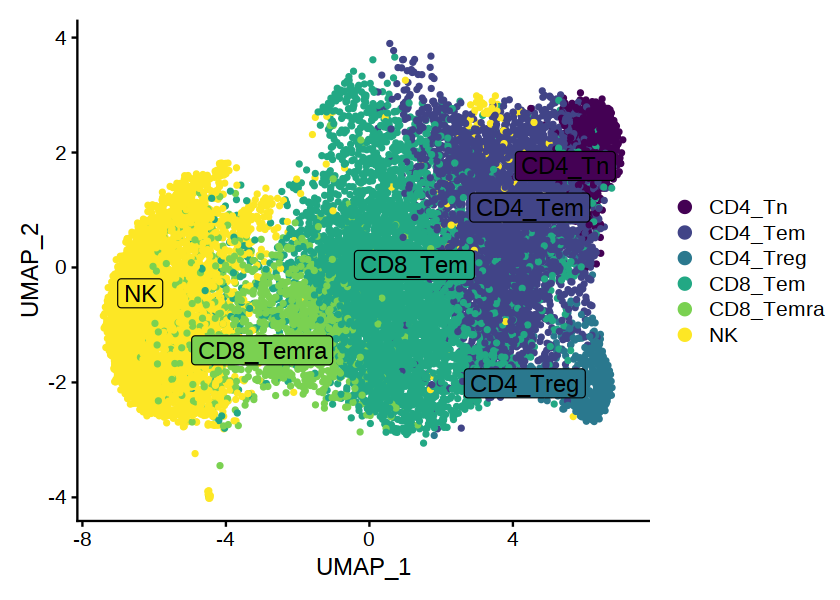

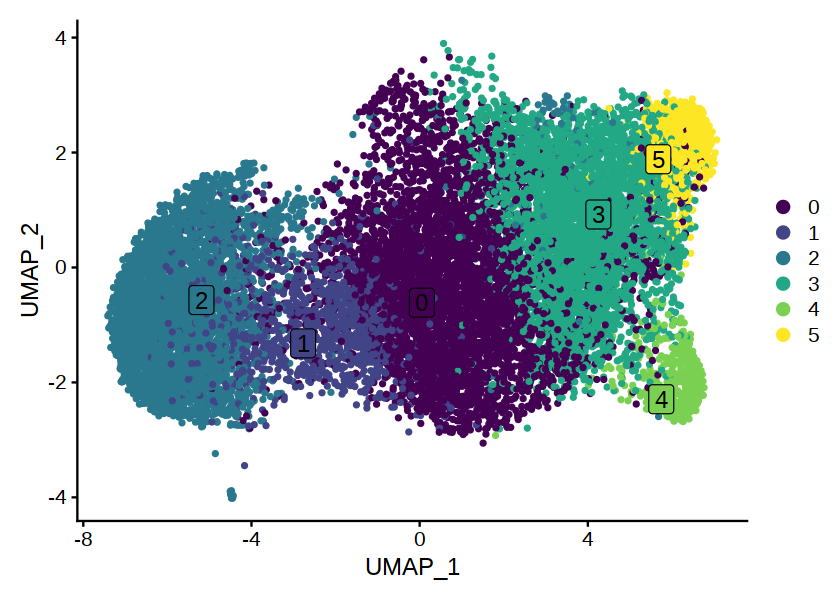

In [2]:
immune <- readRDS('./T_lung.rds')
# immune@meta.data$code <- sapply(immune@meta.data$code, sort_TCR_codes)
options(repr.plot.height = 5, repr.plot.width = 7)
ct.order <- c('CD4_Tn', 'CD4_Tem', 'CD4_Treg', 'CD8_Tem', 'CD8_Temra', 'NK')
immune@meta.data$t_CellType <- factor(immune@meta.data$t_CellType, levels = ct.order)
# pdf('./figures/T_UMAP.pdf', width = 7, height = 5)
Idents(immune) <- 't_CellType'
DimPlot(immune, reduction = "umap", label=TRUE, label.size=5,  cols = viridis(6, option = "D"), 
        label.color = "black", label.box = TRUE, pt.size = 1, raster = FALSE, repel = TRUE) 
# dev.off()

Idents(immune) <- 'celltype.res.0.1'
DimPlot(immune, reduction = "umap", label=TRUE, label.size=5,  cols = viridis(6, option = "D"), 
        label.color = "black", label.box = TRUE, pt.size = 1, raster = FALSE, repel = TRUE) 

In [25]:
# --- Check CCA results
options(repr.plot.height = 5, repr.plot.width = 10)
# Sample
pdf(file="./figures/SampleID.pdf", width=8,height=5)
Idents(immune) <- "SamNum"
DimPlot(immune, reduction = "umap",label = FALSE, pt.size = 1, cols = viridis(25, option = "D"))
dev.off()

# cohort
pdf(file="./figures/Subject.pdf", width=6, height=5)
Idents(immune) <- "Cohort"
DimPlot(immune, reduction = "umap",label = FALSE, pt.size = 1, cols = viridis(3, option = "D"))
dev.off()

png 
  2

png 
  2

In [6]:
# --- FeaturePlot
options(repr.plot.height = 12, repr.plot.width = 18)
DefaultAssay(immune) <- "RNA"
pdf('./figures/T_Features.pdf', width = 18, height = 12)
FeaturePlot(immune, pt.size = 0.5,  
            features=c("CD3D", "CD4", "CD8A", "GZMK", "ANKRD28", "FOXP3", "CCR7", "GNLY"))
dev.off()

png 
  2

`summarise()` has grouped output by 'SamNum'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'SamNum', 'Group'. You can override using the
`.groups` argument.


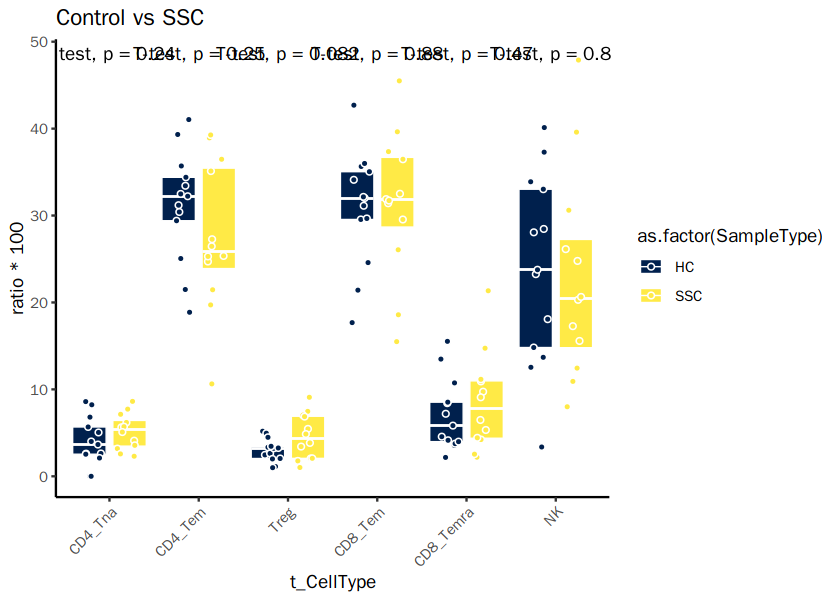

In [35]:
# --- Plot CellProp difference
classifier  <- "Group"
metadata.df  <- immune@meta.data %>%
  tibble::rownames_to_column(var = "Cell")
cell_num.df  <- immune@meta.data %>%
  dplyr::group_by(SamNum, !!sym(classifier)) %>%
  dplyr::summarise(total = n()) %>%
  dplyr::ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  dplyr::select(ID,total)

ratio.df  <- metadata.df %>%
  dplyr::group_by(SamNum,!!sym(classifier), t_CellType) %>% #
  dplyr::summarise(sum = n()) %>%
  ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  tidyr::complete(nesting(SamNum, SampleType), t_CellType, fill = list(sum = 0)) %>% #
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  left_join(cell_num.df, by = "ID") %>%
  rowwise() %>%
  dplyr::mutate(ratio = sum / total )

ratio.df$t_CellType <- factor(ratio.df$t_CellType, ct.order)
# colors.use  <- scales::viridis_pal()(3)[1:2]
colors.use  <- viridis(2, option = "E")
fig.size(5,7)
ggplot(ratio.df,aes(x = t_CellType, y = ratio * 100, fill = as.factor(SampleType))) + #
  geom_boxplot(outlier.shape = NA, position=position_dodge(width=0.9), size = 0.3, colour = "#FFFFFF") +
  geom_point(pch = 21, position = position_jitterdodge(), colour = "white", size = 1.25) +
  #   geom_jitter( size = 0.6 , position=position_dodge(width=0.9),aes(group=SampleType, alpha = 0.6)) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Control vs SSC") +
  scale_fill_manual(values = colors.use)+ 
  stat_compare_means(label.x = 10, method = "t.test") #aes(label = after_stat(p.signif)),
ggsave('./figures/CellProp_with_T_denominators.pdf', width = 7, height = 5)

`summarise()` has grouped output by 'SamNum'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'SamNum', 'Group'. You can override using the
`.groups` argument.


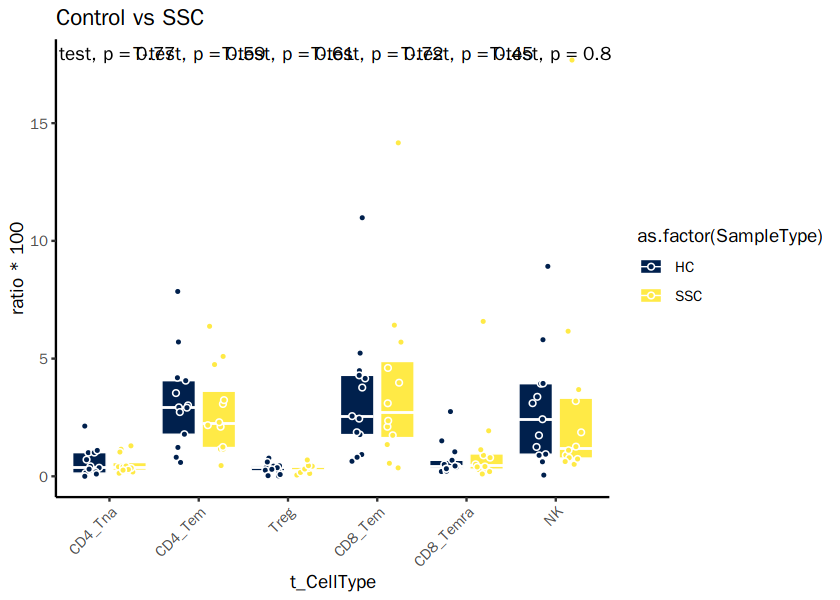

In [37]:
# --- Plot CellProp difference with sample cell number as denominators
# ssc <- readRDS("/share/home/qlab/projects/qlab_yrs/project_ssc/data/object/all/sam_df_anno_SSC.rds")
classifier  <- "Group"
metadata.df  <- immune@meta.data %>%
  tibble::rownames_to_column(var = "Cell")
cell_num.df  <- ssc@meta.data %>%
  dplyr::group_by(SamNum, !!sym(classifier)) %>%
  dplyr::summarise(total = n()) %>%
  dplyr::ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  dplyr::select(ID,total)

ratio.df  <- metadata.df %>%
  dplyr::group_by(SamNum,!!sym(classifier), t_CellType) %>% #
  dplyr::summarise(sum = n()) %>%
  ungroup() %>%
  dplyr::rename(SampleType = 2) %>%
  tidyr::complete(nesting(SamNum, SampleType), t_CellType, fill = list(sum = 0)) %>% #
  dplyr::mutate(ID = paste0(SamNum,".",SampleType)) %>%
  left_join(cell_num.df, by = "ID") %>%
  rowwise() %>%
  dplyr::mutate(ratio = sum / total )

ratio.df$t_CellType <- factor(ratio.df$t_CellType, ct.order)
# colors.use  <- scales::viridis_pal()(3)[1:2]
colors.use  <- viridis(2, option = "E")
fig.size(5,7)
ggplot(ratio.df,aes(x = t_CellType, y = ratio * 100, fill = as.factor(SampleType))) + #
  geom_boxplot(outlier.shape = NA, position=position_dodge(width=0.9), size = 0.3, colour = "#FFFFFF") +
  geom_point(pch = 21, position = position_jitterdodge(), colour = "white", size = 1.25) +
  #   geom_jitter( size = 0.6 , position=position_dodge(width=0.9),aes(group=SampleType, alpha = 0.6)) +
  theme_classic() +
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) +
  ggtitle("Control vs SSC") +
  scale_fill_manual(values = colors.use)+
  stat_compare_means( label.x = 10, method = "t.test") # aes(label = after_stat(p.signif)),
ggsave('./figures/CellProp_with_AllCells_denominators.pdf', width = 7, height = 5)

In [68]:
# # --- HM_Plot Mrkers in each clusters
options(repr.plot.height = 8, repr.plot.width = 5)
# Idents(immune) <- 't_CellType'
# # immune@meta.data$mo_CellType <- factor(immune@meta.data$t_CellType, levels = ct.order)
# markers <- FindAllMarkers(immune, assay = 'RNA', only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# top10 <- markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

mrk.gene <- c("CD3D","CD4",
    "SELL","CCR7","LEF1",
              'ANXA1', 'IL7R', 'ANKRD28', 
                'FOXP3', 'IL2RA', 'CTLA4', 
               "CD8A",'CCL5', 'HLA-DPB1', 'IFNG','GZMK', "GZMH", 'GZMA', 'GZMB',
             'GNLY', 'CCL3'
    )

pdf('./figures/HM_mrkgenes.pdf', width = 5, height= 6)
averageHeatmap(object = immune, markerGene = mrk.gene, annoCol = TRUE, myanCol = viridis(6, option = "D"))
dev.off()

png 
  2

In [80]:
# --- HM：severarl pathway genes
options(repr.plot.height = 12, repr.plot.width = 8)
DefaultAssay(immune) <- 'RNA'
immune@meta.data$hm_group <- paste0(immune@meta.data$Group, '|', immune@meta.data$t_CellType)
Idents(immune) <- 'hm_group'
immune@meta.data$hm_group <- factor(immune@meta.data$hm_group,
                                              levels = c('HC|CD4_Tna', 'SSC|CD4_Tna',
                                                         'HC|CD4_Tem', 'SSC|CD4_Tem',
                                                         'HC|Treg', 'SSC|Treg', 
                                                         'HC|CD8_Tem', 'SSC|CD8_Tem', 
                                                         'HC|CD8_Temra', 'SSC|CD8_Temra',
                                                         'HC|NK', 'SSC|NK'))

cyto.genes <- c('GNLY',  'NKG7','PRF1','GZMA','GZMB','GZMH')
inhibit.genes <- c('HAVCR2', 'LAG3','PDCD1','CTLA4','TIGIT', 'BTLA','TNFRSF18', 'TNFRSF4', 'ICOS') #'KLRC1', ｜
ifm.genes <- c('IFNG', 'IL32','IL1B', 'CCL5', 'CCL18') # inflammatory
atg.genes <- c('B2M', 'HLA-A', 'HLA-B', 'HLA-C', 'HLA-DRA', 'HLA-DRB1')
mrk.genes <- c(cyto.genes, inhibit.genes, ifm.genes, atg.genes) %>% unique()

sam.avg <- AverageExpression(immune, assays = 'RNA', group.by = 'hm_group')
hm.df <- sam.avg$RNA %>% t() %>% as.data.frame() %>% .[, mrk.genes] %>% scale(scale = TRUE, center = TRUE)

info <- immune@meta.data[, c('hm_group', 'Group', 't_CellType')] %>% unique() %>% {rownames(.) <- NULL; .} %>% column_to_rownames(var = 'hm_group') 

ann_colors=list(t_CellType = c(`CD4_Tna` = '#FDE725FF', `CD4_Tem` = '#440154FF', Treg = '#2A788EFF',  CD8_Tem = '#22A884FF', CD8_Temra = '#414487FF', NK = '#7AD151FF'),
                Group = c(SSC = "#B17AA1", HC = "#184995"))
ct.list <- c('HC|CD4_Tna', 'SSC|CD4_Tna',
             'HC|CD4_Tem', 'SSC|CD4_Tem',
             'HC|Treg', 'SSC|Treg', 
             'HC|CD8_Tem', 'SSC|CD8_Tem', 
             'HC|CD8_Temra', 'SSC|CD8_Temra',
             'HC|NK', 'SSC|NK')
pdf('./figures/HM_GeneExp_in_Groups.pdf', width = 10, height = 10)
hm <- pheatmap(hm.df[ct.list,] %>% t(), cluster_row = FALSE, cluster_col = FALSE, 
            color = c(colorRampPalette(colors = c("darkblue","white"))(50),colorRampPalette(colors = c("white", "red"))(50)), 
            main = ("Scale_Express"),
             annotation_col = info[,c('t_CellType','Group')],
             annotation_colors = ann_colors,
             gaps_row = c(
                        length(cyto.genes),
                        length(cyto.genes) + length(inhibit.genes), 
                        length(c(cyto.genes, inhibit.genes)) + length(ifm.genes)),
                        # length(c(cyto.genes, inhibit.genes, ifm.genes))+length(death.genes)),
            gaps_col = c(2,4,6,8,10)
            ) 
print(hm)
dev.off()

Warning message:
“Column annotation has different order from matrix columns. Adjust the
column annotation based on column names of the matrix.”


png 
  2

In [3]:
# --- plot DEGs in each t_CellType
immune.f0 <- subset(immune, Cohort %in% c('ev', 'paul')) 
data <- NULL
for(ct in unique(immune.f0@meta.data$t_CellType)){
    print(ct)
    immune.f <- subset(immune.f0, t_CellType == ct)
    DefaultAssay(immune.f) <- 'RNA'
    cell.ssc <- immune.f@meta.data %>% subset(Group == 'SSC') %>% rownames()
    print(length(cell.ssc))
    cell.hc <- immune.f@meta.data %>% subset(Group == 'HC') %>% rownames()
    print(length(cell.hc))
    diff <- FindMarkers(immune.f, min.pct = 0.01, logfc.threshold = 0.2, ident.1 = cell.ssc, ident.2 = cell.hc) %>% rownames_to_column(var = "gene")
    diff$t_CellType <- ct
    data <- rbind(data, diff)
}
data %>% mutate(Compare = 'SSC_VS_HC') %>% write.csv('FIgure.6.de.csv', row.names = F)
# library(ggsci)
# diff.all <- data
# diff.all$sig <- 'no'
# diff.all$sig[which(diff.all$p_val < 0.05 & diff.all$avg_log2FC > 0.5)] <- 'up'
# diff.all$sig[which(diff.all$p_val < 0.05 & diff.all$avg_log2FC < -0.5)] <- 'down'
# diff.all$label <- ', '
# diff.all$label[which(diff.all$p_val < 0.05 & diff.all$avg_log2FC > 1)] <- diff.all$gene[which(diff.all$p_val < 0.05 & diff.all$avg_log2FC > 1)]
# diff.all$label[which(diff.all$p_val < 0.05 & diff.all$avg_log2FC < -1)] <- diff.all$gene[which(diff.all$p_val < 0.05 & diff.all$avg_log2FC < -1)]
# # diff.all$label[which(diff.all$sig %in% c('down', 'up'))] <- diff.all$gene[which(diff.all$sig %in% c('down', 'up'))] 
# diff.all$t_CellType <- factor(diff.all$t_CellType,
#                               levels = ct.order)

# dfcol<- data.frame(x = ct.order, y = 0, label = ct.order)
# dfcol$label <- factor(dfcol$label, levels = ct.order)
# mycol <- pal_d3("category20")(6)
# # --- Count DEGs numbers
# deg.num.df <- diff.all %>% dplyr::filter(sig %in% c('up', 'down')) %>% 
#                 group_by(t_CellType, sig) %>% summarise(num = n()) %>%
#                 as.data.frame() %>% mutate(num_new = ifelse(sig == 'up', num, -num))
# # # --- set specifically displayed genes
# # hypoxia.rec.genesets <- c('ARNT', 'CA9', 'CREBBP', 'EP300', 'EPAS1', 'EPO', 'HIF1A', 'ELOC', 'ELOB', 'VEGFA', 
# #                           'VHL','CUL2', 'RBX1', 'CITED2', 'HIGD1A', 'HIF1AN', 'HIF3A', 'EGLN2', 'EGLN3')
# # diff.all$label_hypo <-', '
# # diff.all$label_hypo[which(diff.all$gene %in% hypoxia.rec.genesets)] <- diff.all$gene[which(diff.all$gene %in% hypoxia.rec.genesets)]
# # diff.all$label_hypo[which(diff.all$sig == 'no')] <- ', '

# # O2_CO2.rec.genesets <- c('AQP1', 'CA1', 'CA2', 'CA4', 'HBA2', 'HBB', 'RHAG', 'SLC4A1')
# # diff.all$label_o2 <-', '
# # diff.all$label_o2[which(diff.all$gene %in% O2_CO2.rec.genesets)] <- diff.all$gene[which(diff.all$gene %in% O2_CO2.rec.genesets)]
# # diff.all$label_o2[which(diff.all$sig == 'no')] <- ', '

# options(repr.plot.height = 6, repr.plot.width = 10)
# diff.all$sig = factor(diff.all$sig, levels = c('down', 'no', 'up'))
# ggplot()+
#     geom_jitter(data = diff.all %>% dplyr::filter(sig == "no"), 
#                 aes(x = t_CellType, y = avg_log2FC, color = sig), size = 1, width = 0.4, alpha = 0.5) +
#     geom_jitter(data = diff.all %>% dplyr::filter(sig %in% c('down', 'up')),
#                 aes(x = t_CellType, y = avg_log2FC, color = sig), size = 1.5, width = 0.4, alpha = 0.5) +  
#     scale_color_manual(values = c("grey","#184995","#B17AA1")) +
#     # --- plot label
# ggrepel::geom_text_repel(data = diff.all, 
#                          ggplot2::aes(x = t_CellType, y = avg_log2FC, label = label, color = sig), max.overlaps = 50) +
#     # geom_text_repel(data = diff.all, #%>% dplyr::filter(label_hypo == ', ' & label_o2 == ', '), 
#     #                 aes(x = t_CellType, y = avg_log2FC, label=label, color = sig), 
#     #                 size = 3, force = 0.5, max.overlaps = 15) +
#     geom_tile(data = dfcol, aes(x=x, y=y), height=0.5, color = "black", fill = mycol, alpha = 0.8, show.legend = F) +
#     geom_text(data = dfcol, aes(x=x, y=y,label=x), size = 5 , color ="black") +
#     labs(x="t_CellType", y="avg_log2FC") +
#     theme_bw() +  theme(axis.text.x = element_text(angle = 45, hjust = 1, size = 6)) +
#     ggtitle('SSC VS HC in each t_CellType') 
# ggsave('./figures/DEGs_in_tCellType.pdf', width = 7, heigh = 5)

# ggplot() + 
# geom_bar(data= deg.num.df, aes(x = t_CellType, y = num,  fill = sig), stat="summary", fun='mean', position = position_dodge(), alpha = 0.5) +
# scale_fill_manual(values = c("#184995", "#B17AA1")) +
# theme_classic()
# ggsave('./figures/DEGsNumber_in_tCellType.pdf', width = 7, heigh = 5)

[1] "CD8_Tem"
[1] 1435
[1] 2576
[1] "CD8_Temra"
[1] 375
[1] 525
[1] "NK"
[1] 1055
[1] 2404
[1] "CD4_Tem"
[1] 1331
[1] 2455
[1] "CD4_Treg"
[1] 183
[1] 259
[1] "CD4_Tn"
[1] 237
[1] 383


In [70]:
# Enriched Pathway in SSC of each t_CellType
diff.all <- data
# pdf('./figures/upDEGs_Reactome.pdf', width =12, height =6)
for(i in seq_along(ct.order)){
    c1.gene = diff.all %>% dplyr::filter(p_val < 0.05 & avg_log2FC > 0 & t_CellType == ct.order[i]) %>% 
            arrange(-avg_log2FC) %>% pull(gene) %>% .[1:200]
    geneset  <- biosets[['REACTOME']]
    if(length(geneset$genesets[duplicated(geneset$genesets)]) >0){geneset$genesets <- geneset$genesets[!duplicated(geneset$genesets)]}
    hyp_obj <- hypeR(c1.gene, geneset,test="hypergeometric", background=30000)
    hyp_obj$data$label <- str_replace(hyp_obj$data$label, 'REACTOME_', ', ')
    
    pdf(paste0('./figures/ct_reactome/', ct.order[i], '_plot.pdf'), width = 4, height = 5)
    p.plot <- hyp_obj$data %>% dplyr::filter(fdr < 0.01 & pval < 0.05 & overlap >=3 ) %>% arrange(fdr) %>% .[1:10,] %>%
            mutate(pathway = fct_reorder(label, -fdr), GeneNum = overlap) %>%
            ggplot(aes(x = -log10(pval), y = pathway)) +
                geom_point(aes(size = GeneNum, color = -log(fdr))) +
                scale_color_gradient(low="#136885",high = "#FAB35B") +
                theme_bw() + labs(color = "-Log(FDR)") +
                ggtitle(paste0(gsub("(\\D)(\\D+)", "\\U\\1\\L\\2", ct.order[i], perl = TRUE),': enriched Reactome pathways')) + 
                theme(axis.text.y = element_blank())
    print(p.plot)
    dev.off()
        
    pdf(paste0('./figures/ct_reactome/', ct.order[i], '_yaxis.pdf'), width = 8, height = 5)        
    p.y <- hyp_obj$data %>% dplyr::filter(fdr < 0.01 & pval < 0.05 & overlap >=3 ) %>% arrange(fdr) %>% .[1:10,]  %>% 
            mutate(pathway = fct_reorder(label, -fdr), GeneNum = overlap) %>%
            ggplot(aes(x = -log10(pval), y = pathway)) +
                geom_point(aes(size = GeneNum, color = -log(fdr))) +
                scale_color_gradient(low="#136885",high = "#FAB35B") +
                theme_bw() + labs(color = "-Log(FDR)") +
                ggtitle(paste0(gsub("(\\D)(\\D+)", "\\U\\1\\L\\2", ct.order[i], perl = TRUE),': enriched Reactome pathways')) 
    print(p.y)
    dev.off()
}
# dev.off()

ERROR: Error in eval(expr, envir, enclos): 找不到对象'biosets'


Warning message in data.frame(full = codes, type = sub("[^A-Z]+.*", "", codes), :
“NAs introduced by coercion”
Warning message in data.frame(full = codes, type = sub("[^A-Z]+.*", "", codes), :
“NAs introduced by coercion”
Warning message in data.frame(full = codes, type = sub("[^A-Z]+.*", "", codes), :
“NAs introduced by coercion”
Warning message in data.frame(full = codes, type = sub("[^A-Z]+.*", "", codes), :
“NAs introduced by coercion”
Warning message in data.frame(full = codes, type = sub("[^A-Z]+.*", "", codes), :
“NAs introduced by coercion”
Warning message in data.frame(full = codes, type = sub("[^A-Z]+.*", "", codes), :
“NAs introduced by coercion”


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   1.000   1.000   1.903   1.000 104.000 

`summarise()` has grouped output by 'Site', 't_CellType'. You can override using the `.groups` argument.


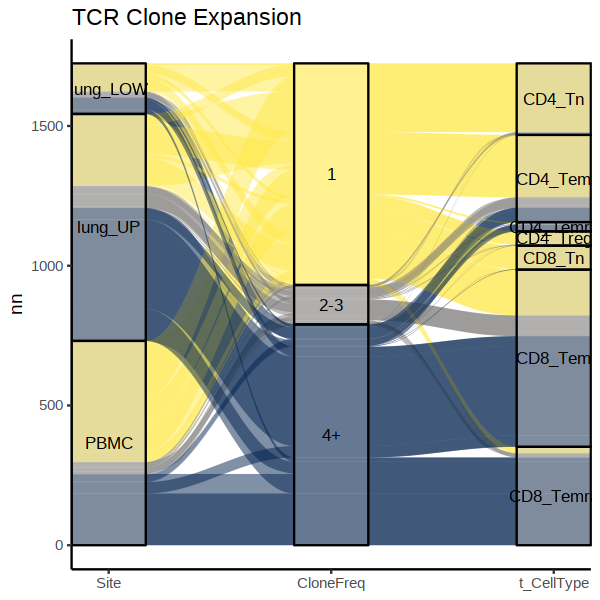

In [64]:
# --- TCR 桑基图
# --- Extract PBMC meta and CellType rename
pbmc.immune <- readRDS('T_pbmc2.rds') %>% subset(Subject == 'jxue') 
pbmc.immune@meta.data$t_CellType[which(pbmc.immune@meta.data$t_CellType == 'CD8_Tna')] <- 'CD8_Tn'
pbmc.meta <- pbmc.immune@meta.data %>% subset(t_CellType %in% c('CD4_Tn', 'CD4_Tem', 'CD4_Temra', 'CD4_Treg', 'CD8_Tn', 'CD8_Tem', 'CD8_Temra'))
# --- rename
pbmc.meta$t_CellType <- as.character(pbmc.meta$t_CellType)
pbmc.meta.cell <- pbmc.meta %>% mutate(Cohort = Subject) %>% .[,c('Cohort', 't_CellType')] %>% rownames_to_column(var = 'barcode') %>% mutate(Site = 'PBMC') 
lung.meta.cell <- immune@meta.data %>% dplyr::filter(Cohort == 'jxue') %>% dplyr::filter(t_CellType %in%  c('CD4_Tn', 'CD4_Tem', 'CD4_Treg', 'CD8_Tn', 'CD8_Tem', 'CD8_Temra')) %>%
                    .[,c('Cohort', 'Site', 't_CellType')] %>% rownames_to_column(var = 'barcode')
meta.cell <- rbind(pbmc.meta.cell, lung.meta.cell)
# --- Added TCR cell_clone results
tcr.df <- readRDS('/share/home/qlab/projects/qlab_yrs/project_ssc/matrix/TCR/cell_tcr.rds') %>% dplyr::rename(barcode = cell) %>%
            left_join(meta.cell, by ='barcode')
tcr.df$code <- sapply(tcr.df$code, sort_TCR_codes)
tcr.clone.freq <- tcr.df %>% na.omit() %>% group_by(code) %>% summarise(CloneFreq = n()) %>% as.data.frame() %>% dplyr::filter(code != 'NA')
tcr.df <- tcr.df %>% dplyr::filter(code != 'NA') %>% na.omit() %>% # --- 去除 NA
            left_join(tcr.clone.freq, by = 'code')

# --- define Clone classification
summary(tcr.clone.freq$CloneFreq)
tcr.df$CloneType <- '0'
tcr.df$CloneType[which(tcr.df$CloneFreq == 1)] <- '1'
tcr.df$CloneType[which(tcr.df$CloneFreq > 1 & tcr.df$CloneFreq <= 3)] <- '2-3'
tcr.df$CloneType[which(tcr.df$CloneFreq > 3)] <- '4+'
tcr.df$t_CellType <- factor(tcr.df$t_CellType, levels = c('CD4_Tn', 'CD4_Tem', 'CD4_Temra', 'CD4_Treg', 'CD8_Tn', 'CD8_Tem', 'CD8_Temra'))

library(ggalluvial)
options(repr.plot.height = 5, repr.plot.width = 5)
tcr.df %>% group_by(Site, t_CellType, CloneType) %>% summarise(nn = n()) %>% as.data.frame() %>%
ggplot(aes(y = nn, axis1 = Site, axis2 = CloneType, fill = CloneType, axis3 = t_CellType))+
  geom_flow()+
  geom_alluvium(aes(fill = CloneType), curve_type = "sine") +
  scale_fill_manual(values = c(`4+` = '#00204DFF',  `2-3` = '#7C7B78FF', `1` = '#FFEA46FF')) +
  guides(fill = "none") +
  geom_stratum(alpha = .2) +
  geom_text(stat = "stratum", size=3.5, aes(label = after_stat(stratum)),reverse = T) +
  scale_x_continuous(breaks = 1:3, expand = c(0,0), labels = c("Site", "CloneFreq", "t_CellType")) +
  theme_classic() +
  ggtitle("TCR Clone Expansion") 
ggsave('./figures/TCR_expansion_sankey.pdf', width = 5, height =5)

In [38]:
# --- Upset plots shows the shared TCR clonetype in three sites
library(UpSetR)
tcr.df$code %>% unique() %>% na.omit() %>% length()
upset_data <- tcr.df %>% dplyr::group_by(Site, code) %>% dplyr::summarise(Num = n()) %>% as.data.frame() %>% 
                pivot_wider(names_from = Site, values_from = Num, values_fill = 0) %>% as.data.frame() %>% column_to_rownames(var = 'code') %>% 
                mutate(LOW = ifelse(lung_LOW > 0, 1, 0), PBMC = ifelse(PBMC > 0, 1, 0), UP = ifelse(lung_UP > 0, 1, 0)) 
head(upset_data)
pdf('./figures/TCR_CloneType_UpSetR.pdf', width = 5, height = 5)
upset(
    upset_data,
  sets = c("LOW", "PBMC", "UP"), # Specify the sets
  nintersects = 10,              # Show top 10 intersections
  order.by = "freq",             # Order intersections by frequency
  decreasing = TRUE              # Descending order
)
dev.off()

[1] 822

`summarise()` has grouped output by 'Site'. You can override using the `.groups` argument.


,PBMC,lung_LOW,lung_UP,LOW,UP
,<dbl>,<int>,<int>,<dbl>,<dbl>
TRA_100;TRA_482;TRB_477,1,0,0,0,0
TRA_100;TRB_98,1,0,0,0,0
TRA_102;TRB_101,1,0,0,0,0
TRA_103;TRB_102,1,0,0,0,0
TRA_106;TRB_104,1,0,0,0,0
TRA_107;TRB_106,1,0,0,0,0


png 
  2

In [39]:
# --- Extract TCRs shared in both UP, LOW & PBMC
sites3.tcr <- upset_data %>% dplyr::filter(LOW > 0 & PBMC > 0 & UP > 0) %>% rownames()
tcr.code <- readRDS('/share/home/qlab/projects/qlab_yrs/project_ssc/matrix/TCR/tcr_new_codes.rds') %>% 
                dplyr::filter(code %in% (sites3.tcr %>% str_split(';') %>% unlist()))
tcr_replacement <- setNames(tcr.code$TRtype, tcr.code$code)
output_list <- sapply(sites3.tcr, replace_code_with_sequence, replacement_map = tcr_replacement)
output_list %>% as.data.frame() %>% write.csv('Sites3_TCRseq.csv')

In [84]:
share.tcr = upset_data %>% mutate(nn = (PBMC + LOW + UP)) %>% dplyr::filter( nn > 1) %>% rownames()
cyto.tcr = tcr.df %>% dplyr::filter(t_CellType %in% c('CD4_Tem', 'CD8_Tem', 'CD8_Temra')) %>% pull(code) %>% unique()
intersect(share.tcr, cyto.tcr) %>% length()

[1] 59

In [42]:
# --- Plot three sites overlapped TCR sequence
tcr.df <- readRDS('/share/home/qlab/projects/qlab_yrs/project_ssc/matrix/TCR/cell_tcr.rds') %>% dplyr::rename(barcode = cell) %>%
            left_join(meta.cell, by ='barcode') %>% dplyr::filter(barcode %in% rownames(immune@meta.data)) %>% .[,c('barcode', 'code')]
tcr.df$code <- sapply(tcr.df$code, sort_TCR_codes)
immune@meta.data <- immune@meta.data[,c('orig.ident', 'nCount_RNA', 'nFeature_RNA', 'SamNum', 'SampleID', 'Group',
                        'Site', 'Gender', 'Age', 'Cohort', 'percent.mt', 'S.Score', 'G2M.Score', 
                        'Phase', 'IFN.Score1', 'integrated_snn_res.0.1', 'integrated_snn_res.0.2', 
                        'integrated_snn_res.0.4', 'integrated_snn_res.0.8', 'integrated_snn_res.1.2',
                        'integrated_snn_res.1.6', 'integrated_snn_res.2', 'integrated_snn_res.3',
                        'seurat_clusters', 'CellType', 'pANN', 'DF.classifications', 'cell', 'DF2',
                        'DF_hi.lo', 'SamSplit', 't_CellType')] %>% rownames_to_column(var = 'barcode') %>%
                    left_join(tcr.df, by = 'barcode' ) %>%
                    column_to_rownames(var = 'barcode')
cell.high <- immune@meta.data %>% dplyr::filter(code %in% sites3.tcr) %>% rownames()
# pdf('./figures/LUNG_Overlapped_TCR.pdf',  width = 7, height = 5)
Idents(immune) <- 't_CellType'
DimPlot(immune, reduction = "umap", label=TRUE, label.size=5, cells.highlight = cell.high,
        label.color = "black", label.box = TRUE, pt.size = 1, raster = FALSE, repel = TRUE) +
ggtitle('LUNG: UP, LOW and PBMC shared TCR CloneType')
dev.off()

# --- Circle CD8_Tem & CD8_Temra: 这一部分需要在终端中跑，jupyter中无法输出结果！！！
library(ggunchull)
# Define custom colors for clusters
custom_colors <- c("CD8_Tem" = '#22A884FF', "CD8_Temra" = '#7AD151FF')
plotData <- as.data.frame(immune[['umap']]@cell.embeddings)
plotData$cluster <- immune$t_CellType
# pdf('./figures/lung_circle.pdf',  width = 7, height = 5)
my_plot <- ggplot(plotData, aes(x = UMAP_1, y = UMAP_2, fill = cluster, color = cluster)) +
      # stat_unchull(alpha = 0.3, size = 0.5, delta = 0.05) +
      stat_unchull(
        data = subset(plotData, cluster %in% c('CD8_Tem', 'CD8_Temra')), 
        aes(x = UMAP_1, y = UMAP_2, fill = cluster, color = cluster), 
        alpha = 0.3, 
        size = 0.5, 
        delta = 0.05
      ) +
      # Apply custom colors
      scale_color_manual(values = custom_colors) +
      scale_fill_manual(values = custom_colors) +
      geom_point(size = 0.5) +
      theme(
        aspect.ratio = 1,
        panel.background = element_blank(),
        panel.grid = element_blank(),
        axis.line = element_line()
      )
ggsave('./figures/lung_circle.pdf', plot = my_plot, width = 7, height = 5)

png 
  2

Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


In [12]:
# # --- Added TCR into Lung Seurat Object
# meta <- immune@meta.data[,c('orig.ident', 'nCount_RNA', 'nFeature_RNA', 'SamNum', 'SampleID',
#                             'Group', 'Site', 'Gender', 'Age', 'Cohort', 'percent.mt', 'S.Score',
#                             'G2M.Score', 'Phase', 'IFN.Score1', 'integrated_snn_res.0.1', 
#                             'integrated_snn_res.0.2', 'integrated_snn_res.0.4', 'integrated_snn_res.0.8', 
#                             'integrated_snn_res.1.2', 'integrated_snn_res.1.6', 'integrated_snn_res.2',
#                             'integrated_snn_res.3', 'seurat_clusters', 'CellType', 'pANN', 
#                             'DF.classifications', 'cell', 'DF2', 'DF_hi.lo', 'SamSplit', 't_CellType')] %>%
#             rownames_to_column(var = 'barcode')
# tcr.df <- readRDS('/share/home/qlab/projects/qlab_yrs/project_ssc/matrix/TCR/cell_tcr.rds') %>% dplyr::rename(barcode = cell)
# meta <- left_join(meta, tcr.df, by = 'barcode') %>% column_to_rownames(var = 'barcode')
# immune@meta.data <- meta
# saveRDS(immune, 'T_lung.rds')

In [65]:
print('All shared TCR clones')
share.tcr <- upset_data %>% mutate(Share = rowSums(.)) %>% dplyr::filter(Share > 1) %>% rownames()
immune@meta.data %>%
  filter(code %in% share.tcr) %>%              # Filter rows where 'code' matches 'share.tcr'
  count(t_CellType) %>%                        # Count the occurrences of each 't_CellType'
  mutate(proportion = n / sum(n))              # Calculate proportions

[1] "All shared TCR clones"


t_CellType,n,proportion
<fct>,<int>,<dbl>
CD4_Tem,32,0.062992126
Treg,1,0.001968504
CD8_Tem,330,0.649606299
CD8_Temra,126,0.248031496
NK,19,0.037401575


In [86]:
tcr.df %>% dplyr::filter(code %in% share.tcr)  %>% group_by(t_CellType, code) %>% summarise(nn = n()) %>%
mutate(nn = ifelse(nn > 0, 1, 0)) %>% 
pivot_wider(names_from = t_CellType, values_from = nn, values_fill = 0) %>% column_to_rownames(var = 'code') %>% 
mutate(Tem = CD4_Temra + CD8_Tem + CD8_Temra) %>% 
mutate(Tem = ifelse(Tem > 0, 1, 0)) %>% t() %>%  
as.data.frame() %>% mutate(UniqTCRnum = rowSums(.)) %>% .[,c('UniqTCRnum')]

`summarise()` has grouped output by 't_CellType'. You can override using the `.groups` argument.


CD4_Tna   CD4_Tem CD4_Temra      Treg   CD8_Tem CD8_Temra       Tem 
        1        24        16         1        65        48        70

In [36]:
# --- Create Scoupe_Loom file
library(SCopeLoomR)
library(hdf5r)
immune <- readRDS('./T_lung.rds')
# --- 01 Create a loom file
build_loom(file.name = "lung_immune.loom",
        dgem = immune@assays$RNA@counts,
        title = "T_lymphocyte",
        default.embedding = immune@reductions$umap@cell.embeddings,
        default.embedding.name = "umap.rna")

loom <- open_loom("lung_immune.loom", mode = "r+")
# --- 02 Add hierachy
add_hierarchy(
  loom = loom,
  hierarchy = create_hierarchy(
    level.1.name = "SSc-ILD",
    level.2.name = "Lung-T"
  )
)
# --- 03 Add embedding(s)
add_embedding(loom = loom, 
              embedding = immune@reductions$pca@cell.embeddings,
              name = "pca")

# --- 04 Add MetaDate
names(loom[["col_attrs"]])
add_col_attr(loom = loom, key = "Sample", value = immune@meta.data$SamNum, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Group", value = immune@meta.data$Group, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Site", value = immune@meta.data$Site, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Age", value = immune@meta.data$Age, as.metric = TRUE)
add_col_attr(loom = loom, key = "Gender", value = immune@meta.data$Gender, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Cohort", value = immune@meta.data$Cohort, as.annotation = TRUE)

immune@meta.data$t_CellType <- as.character(immune@meta.data$t_CellType)
add_col_attr(loom = loom, key = "CellType", value = immune@meta.data$t_CellType, as.annotation = TRUE)

names(loom[["col_attrs"]])

# --- 05 Add Seurat clusters and markers
add_seurat_clustering(loom = loom,
        seurat = immune,
        seurat.assay = "RNA",
        seurat.clustering.prefix = "celltype.res.",
        seurat.markers.file.path.list = 
          list(celltype.res.0.1 = './SnnGenes/lung_ct_res.0.1.rds.gz'),
        seurat.marker.metric.accessors = c("avg_log2FC", "p_val"),
        seurat.marker.metric.names = c("Avg. log2FC", "P-value"),
        seurat.marker.metric.description = c("Average log fold change", "Adjusted p-value (BF)")
)

# --- 06 save loom file
close_loom(loom)

[1] "Adding global attributes..."
[1] "Adding matrix..."
  |======================================================================| 100%[1] "Adding column attributes..."
[1] "Adding default metrics nUMI..."
[1] "Adding default metrics nGene..."
[1] "Adding default embedding..."
[1] "Adding row attributes..."
[1] "Adding columns graphs..."
[1] "Adding row graphs..."
[1] "Adding layers..."
[1] "Adding embedding pca..."


[1] "CellID"       "Embedding"    "Embeddings_X" "Embeddings_Y" "nGene"       
[6] "nUMI"

[1] "Age"          "CellID"       "CellType"     "Cohort"       "Embedding"   
 [6] "Embeddings_X" "Embeddings_Y" "Gender"       "Group"        "Sample"      
[11] "Site"         "nGene"        "nUMI"

[1] "Seurat, celltype.res.0.1"
[1] "Adding Seurat clusters..."
[1] "Clusterings created..."
[1] "Clustering ID: 0"
[1] "Adding Seurat markers..."
[1] "Adding markers for clustering 0..."
[1] "Adding metrics for clustering 0..."


In [7]:
pbmc.immune <- readRDS('T_pbmc.rds') %>% subset(Subject == 'jxue') 

In [10]:
pbmc.immune@meta.data$t_CellType %>% unique() #%>% length()

[1] "CD8_Temra" "CD4_Tn"    "CD8_Tem"   "CD8_Tna"   "NK"        "CD4_Tem"  
[7] "CD4_Treg"  "CD4_Temra" "CD8_Tmait"

In [2]:
# pbmc.immune <- readRDS('T_pbmc.rds')
# pbmc.immune@meta.data$Cohort <- 'cl'
# pbmc.immune@meta.data$Cohort[which(pbmc.immune@meta.data$Subject == 'jxue')] <- 'jxue'
# pbmc.immune@meta.data$Age[which(pbmc.immune@meta.data$Subject == 'jxue')] <- '54'
# pbmc.immune@meta.data$Tissue <- 'pbmc'
# pbmc.immune@meta.data$t_CellType <- as.character(pbmc.immune@meta.data$t_CellType)
# pbmc.immune@meta.data$t_CellType[which(pbmc.immune@meta.data$t_CellType == 'CD4_Tna')] <- 'CD4_Tn'
# pbmc.immune@meta.data$t_CellType[which(pbmc.immune@meta.data$t_CellType == 'Treg')] <- 'CD4_Treg'
# # ct.res <- data.frame(t_CellType = pbmc.immune@meta.data$t_CellType %>% as.character() %>% unique(),
# #                      celltype.res.0.1 = 0:(length(pbmc.immune@meta.data$t_CellType %>% as.character() %>% unique()) - 1))
# # meta <- pbmc.immune@meta.data
# # pbmc.immune@meta.data <- meta %>% 
# #                         rownames_to_column(var = 'cell') %>%
# #                         left_join(ct.res, by = 't_CellType') %>%
# #                         column_to_rownames(var = 'cell')
# pbmc.immune@meta.data$Age[which(pbmc.immune@meta.data$Subject == 'CHI014')] <- 'unknow'
# pbmc.immune@meta.data$Gender[which(pbmc.immune@meta.data$Subject == 'CHI014')] <- 'unknow'
# saveRDS(pbmc.immune, 'T_pbmc2.rds')

pbmc.immune <- readRDS('T_pbmc2.rds')
# options(repr.plot.height = 5, repr.plot.width = 7)
# ct.order <- c('CD4_Tn', 'CD4_Tem', 'CD4_Temra', 'CD4_Treg', 'CD8_Tna', 'CD8_Tem', 'CD8_Temra', 'CD8_Tmait', 'NK')
# pbmc.immune@meta.data$t_CellType <- factor(pbmc.immune@meta.data$t_CellType, levels = ct.order)
# # pdf('./figures/PBMC_UMAP.pdf', width = 6, height = 5)
# Idents(pbmc.immune) <- 't_CellType'
# DimPlot(pbmc.immune, reduction = "umap", label=TRUE, label.size=5,  
#         cols = c('#440154FF','#414487FF', '#472D7BFF', '#2A788EFF', '#AADC32FF','#22A884FF','#7AD151FF', '#B8DE29FF','#FDE725FF'), 
#         label.color = "black", label.box = TRUE, pt.size = 1, raster = FALSE, repel = TRUE) 
# # dev.off()

# Idents(pbmc.immune) <- 'celltype.res.0.1'
# DimPlot(pbmc.immune, reduction = "umap", label=TRUE, label.size=5,  cols = viridis(9, option = "D"), 
#         label.color = "black", label.box = TRUE, pt.size = 1, raster = FALSE, repel = TRUE) 

In [3]:
pbmc.immune@meta.data$CellType %>% unique()

[1] T8_EMRA   Treg      T8_Memory T8_Naive  NK_cell   T4_Naive  T4_Memory
16 Levels: T4_Naive T8_EMRA CD14_mono T4_Memory B_cell T8_Memory ... RBC

In [33]:
DefaultAssay(pbmc.immune) <- "RNA"
Idents(pbmc.immune) <- "celltype.res.0.1"
markers <- FindAllMarkers(pbmc.immune, only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
saveRDS(markers, file = paste0('SnnGenes/pbmc_ct_res.0.1.rds.gz'), compress = "gzip")

Calculating cluster 0

Calculating cluster 1

Calculating cluster 2

Calculating cluster 3

Calculating cluster 4

Calculating cluster 5

Calculating cluster 6

Calculating cluster 7

Calculating cluster 8



In [106]:
# Plot three sites overlapped TCR sequence
tcr.df <- readRDS('/share/home/qlab/projects/qlab_yrs/project_ssc/matrix/TCR/cell_tcr.rds') %>% dplyr::rename(barcode = cell) %>%
            left_join(meta.cell, by ='barcode') %>% dplyr::filter(barcode %in% rownames(pbmc.immune@meta.data)) %>% .[,c('barcode', 'code')]
pbmc.immune@meta.data <- pbmc.immune@meta.data[,c('orig.ident', 'nCount_RNA', 'nFeature_RNA', 'Sample', 'Group', 'Subject', 'Gender', 'Age',
                                    'percent.mt', 'S.Score', 'G2M.Score', 'Phase', 'old.ident', 'IFN.Score1',
                                    'integrated_snn_res.0.1', 'integrated_snn_res.0.2', 'integrated_snn_res.0.4', 'integrated_snn_res.0.8', 
                                    'integrated_snn_res.1.2', 'integrated_snn_res.1.6', 'integrated_snn_res.2', 'integrated_snn_res.3', 
                                    'seurat_clusters', 'CellType', 't_CellType')] %>% rownames_to_column(var = 'barcode') %>%
                            left_join(tcr.df, by = 'barcode' ) %>%
                            column_to_rownames(var = 'barcode')
cell.high <- pbmc.immune@meta.data %>% dplyr::filter(code %in% sites3.tcr) %>% rownames()
pdf('./figures/PBMC_Overlapped_TCR.pdf', width = 6, height = 5)
Idents(pbmc.immune) <- 't_CellType'
DimPlot(pbmc.immune, reduction = "umap", label=TRUE, label.size=5, cells.highlight = cell.high,
        label.color = "black", label.box = TRUE, pt.size = 1, raster = FALSE, repel = TRUE) +
ggtitle('PBMC: UP, LOW and PBMC shared TCR CloneType')
dev.off()

png 
  2

In [22]:
# # --- HM_Plot Mrkers in each clusters
options(repr.plot.height = 8, repr.plot.width = 5)
# Idents(pbmc.immune) <- 't_CellType'
# # pbmc.immune@meta.data$mo_CellType <- factor(pbmc.immune@meta.data$t_CellType, levels = ct.order)
# markers <- FindAllMarkers(pbmc.immune, assay = 'RNA', only.pos = TRUE, min.pct = 0.25, logfc.threshold = 0.25)
# top10 <- markers %>% group_by(cluster) %>% top_n(n = 10, wt = avg_log2FC)

mrk.gene <- c("CD3D","CD4","CD8A",
    "CCR7","LEF1", 'ANXA1', 'ANKRD28',
                'FOXP3', 'CTLA4', 'GZMK', 'CCL5',
               'IFNG','FGFBP2', 'CX3CR1', 'MAF', 'SLC4A10','NCAM1', 'NCR1'
    )

pdf('./figures/HM_mrkgenes.pdf', width = 5, height= 6)
averageHeatmap(object = pbmc.immune, markerGene = mrk.gene, annoCol = TRUE, myanCol = viridis(9, option = "D"))
dev.off()

png 
  2

In [54]:
pbmc.immune@meta.data[,c('Sample','Group','Subject','Age', 'Cohort', 'Gender')] %>% distinct()

,Sample,Group,Subject,Age,Cohort,Gender
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
SSC_AAACCTGCAACTGGCC-1,PBMC,SSC,jxue,54,jxue,Male
HC_AAAGTAGGTCACAAGG-1_1,NA,HC,CHI014,unknow,cl,unknow
HC_AAAGATGCAAACTGCT-1_1,NA,HC,AA220534,47,cl,Male
HC_ACGATGTTCCCTGACT-1_1,NA,HC,AA220014,67,cl,Male
HC_AGAGCGATCACTTACT-1_1,NA,HC,IM000040,37,cl,Male
HC_ACGGGTCTCTTGAGAC-1_1,NA,HC,AA220907,32,cl,Female
HC_AAACCTGAGTACTTGC-01_2,NA,HC,SHD4,63,cl,Male
HC_AAACCTGCACTTCGAA-01_2,NA,HC,SHD2,53,cl,Male
HC_AAACCTGCATTTCAGG-01_2,NA,HC,HDVO_PBMC,30,cl,Male


In [56]:
# --- Create Scoupe_Loom file
library(SCopeLoomR)
library(hdf5r)
immune <- readRDS('./T_pbmc2.rds')
# --- 01 Create a loom file
build_loom(file.name = "pbmc_immune.loom",
        dgem = immune@assays$RNA@counts,
        title = "T_lymphocyte",
        default.embedding = immune@reductions$umap@cell.embeddings,
        default.embedding.name = "umap.rna")

loom <- open_loom("pbmc_immune.loom", mode = "r+")
# --- 02 Add hierachy
add_hierarchy(
  loom = loom,
  hierarchy = create_hierarchy(
    level.1.name = "SSc-ILD",
    level.2.name = "PBMC-T"
  )
)
# --- 03 Add embedding(s)
add_embedding(loom = loom, 
              embedding = immune@reductions$pca@cell.embeddings,
              name = "pca")

# --- 04 Add MetaDate
names(loom[["col_attrs"]])
add_col_attr(loom = loom, key = "Sample", value = immune@meta.data$Subject, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Group", value = immune@meta.data$Group, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Site", value = immune@meta.data$Tissue, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Age", value = immune@meta.data$Age, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Gender", value = immune@meta.data$Gender, as.annotation = TRUE)
add_col_attr(loom = loom, key = "Cohort", value = immune@meta.data$Cohort, as.annotation = TRUE)

immune@meta.data$t_CellType <- as.character(immune@meta.data$t_CellType)
add_col_attr(loom = loom, key = "CellType", value = immune@meta.data$t_CellType, as.annotation = TRUE)

names(loom[["col_attrs"]])

# --- 05 Add Seurat clusters and markers
add_seurat_clustering(loom = loom,
        seurat = immune,
        seurat.assay = "RNA",
        seurat.clustering.prefix = "celltype.res.",
        seurat.markers.file.path.list = 
          list(celltype.res.0.1 = './SnnGenes/pbmc_ct_res.0.1.rds.gz'),
        seurat.marker.metric.accessors = c("avg_log2FC", "p_val"),
        seurat.marker.metric.names = c("Avg. log2FC", "P-value"),
        seurat.marker.metric.description = c("Average log fold change", "Adjusted p-value (BF)")
)

# --- 06 save loom file
close_loom(loom)